In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.preprocessing import Imputer
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

import knn_impute as knn
#from fancyimpute import KNN
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((891, 12), (418, 11))

In [4]:
train_orginal = train.copy()
test_orginal  = test.copy()

In [5]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

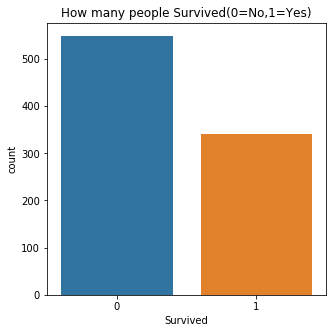

In [7]:
plt.figure(figsize=(5,5))
plt.title('How many people Survived(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(train['Survived'])

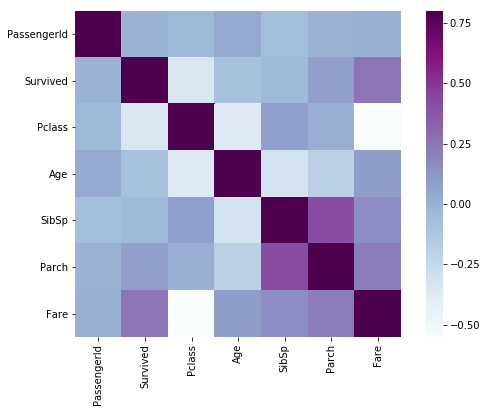

In [8]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [9]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

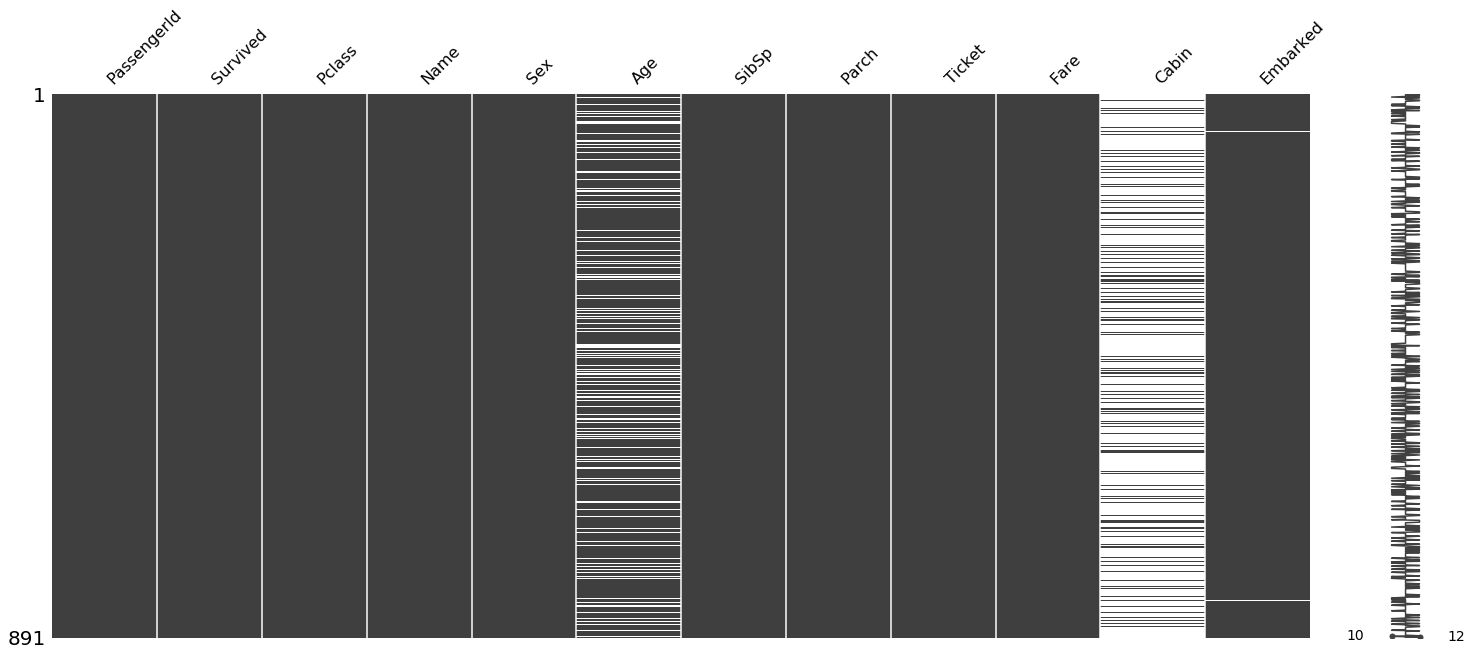

In [11]:
ms.matrix(train)

In [12]:
age_backup=knn.knn_impute(target=train['Age'], attributes=train.drop(['Age', 'PassengerId'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

In [13]:
train['Age']=age_backup

In [14]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
gender = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(gender)

In [16]:
names=train['Name']
cabin=train['Cabin']
embark=train['Embarked']

In [17]:
train=train.drop('Name',axis=1)
train=train.drop('Cabin',axis=1)
train=train.drop('Embarked',axis=1)
train=train.drop('Ticket',axis=1)

In [18]:
PassengerId=train['PassengerId']
train=train.drop('PassengerId',axis=1)

In [19]:
train['Age'].fillna(train['Age'].mode()[0], inplace=True)


In [20]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [22]:
y = train["Survived"]
X = train.drop('Survived',1)
#imp = Imputer(missing_values="NaN", strategy='mean', axis=0)

#X= imp.fit_transform(X)


In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.890


### using classification_report we can decide which model will be better

In [33]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

[[548   1]
 [ 11 331]]
accuracy_score 0.9865319865319865


# Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures

The first thing you will see here is ROC curve and we can determine whether our ROC curve is good or not by looking at AUC (Area Under the Curve) and other parameters which are also called as Confusion Metrics. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. All the measures except AUC can be calculated by using left most four parameters. So, let’s talk about those four parameters first.




This blog demonstrates how to evaluate the performance of a model via Accuracy, Precision, Recall & F1 Score metrics in  ML and provides a brief explanation of the “Confusion Metrics”. In this experiment, I have used Two-class Boosted Decision Tree Algorithm and my goal is to predict the survival of the passengers on the Titanic.

Once you have built your model, the most important question that arises is how good is your model? So, evaluating your model is the most important task in the data science project which delineates how good your predictions are.

The first thing you will see here is ROC curve and we can determine whether our ROC curve is good or not by looking at AUC (Area Under the Curve) and other parameters which are also called as Confusion Metrics. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. All the measures except AUC can be calculated by using left most four parameters. So, let’s talk about those four parameters first.

![title](confusion_matrix_1.png)

True positive and true negatives are the observations that are correctly predicted and therefore shown in green. We want to minimize false positives and false negatives so they are shown in red color. These terms are a bit confusing. So let’s take each term one by one and understand it fully.

#### True Positives (TP)
These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

#### True Negatives (TN) 
These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

#### False positives and false negatives,
these values occur when your actual class contradicts with the predicted class.

#### False Positives (FP)
When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

#### False Negatives (FN) 
When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

#### Accuracy 
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

##### Accuracy = TP+TN/TP+FP+FN+TN

#### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

##### Precision = TP/TP+FP

#### Recall (Sensitivity)
Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

##### Recall = TP/TP+FN

#### F1 score 
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

###### F1 Score = 2*(Recall * Precision) / (Recall + Precision)

So, whenever you build a model, this article should help you to figure out what these parameters mean and how good your model has performed.

I hope you found this blog useful. Please leave comments or send me an email if you think I missed any important details or if you have any other questions or feedback about this topic.

**Please Note that the above results and analysis of numbers is based on the Titanic model. Your numbers and results may vary upon which model you work on and your specific business use case.

Related videos: https://www.youtube.com/channel/UC9jOb7yEfGwxjjdpWMjmKJA

### Sensitivity and Specificity

By changing the threshold, the good and bad customers classification will be changed hence the sensitivity and specificity will be changed.
Which one of these two we should maximize? What should be ideal threshold?
Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off.
Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives.
Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificityThe threshold is set based on business problem

#### When Sensitivity is a High Priority
Predicting a bad customers or defaulters before issuing the loan

![title](1.png)

Predicting a bad defaulters before issuing the loan

![title](2.png)


The profit on good customer loan is not equal to the loss on one bad customer loan.
The loss on one bad loan might eat up the profit on 100 good customers.
In this case one bad customer is not equal to one good customer.
If p is probability of default then we would like to set our threshold in such a way that we don’t miss any of the bad customers.
We set the threshold in such a way that Sensitivity is high.
We can compromise on specificity here. If we wrongly reject a good customer, our loss is very less compared to giving a loan to a bad customer.
We don’t really worry about the good customers here, they are not harmful hence we can have less Specificity.

#### When Specificity is a High Priority
Testing a medicine is good or poisonous

![title](3.png)

Testing a medicine is good or poisonous

![title](4.png)

In this case, we have to really avoid cases like , Actual medicine is poisonous and model is predicting them as good.
We can’t take any chance here.
The specificity need to be near 100.
The sensitivity can be compromised here. It is not very harmful not to use a good medicine when compared with vice versa case.

##### Sensitivity vs Specificity – Importance
There are some cases where Sensitivity is important and need to be near to 1.
There are business cases where Specificity is important and need to be near to 1.
We need to understand the business problem and decide the importance of Sensitivity and Specificity.


### Calculating  Accuracy, Precision, Recall , F1 ScoreSensitivity and Specificity in Python

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)


[[544   5]
 [ 15 327]]


#### calculate accuracy_score

In [37]:
#from sklearn.metrics import average_precision_score
#from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
score = accuracy_score(y, y_pred)
print('accuracy_score',score)

accuracy_score 0.9775533108866442


#### calculate F1 score

In [41]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print(f1)

0.970326409495549


#### using classification_report we can decide which model will be better

In [38]:
from sklearn.metrics import classification_report
target_names = ['Surived','Died']
print(classification_report(y, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Surived       0.97      0.99      0.98       549
       Died       0.98      0.96      0.97       342

avg / total       0.98      0.98      0.98       891



#### calculate sensitivity

In [45]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

Sensitivity :  0.9908925318761385


#### calculate specificity

In [46]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.956140350877193


### ROC Curve
If we consider all the possible threshold values and the corresponding specificity and sensitivity rate what will be the final model accuracy.
ROC(Receiver operating characteristic) curve is drawn by taking False positive rate on X-axis and True positive rate on Y- axis.
ROC tells us, how many mistakes are we making to identify all the positives?

![title](5.png)

#### ROC Curve – Interpretation
How many mistakes are we making to identify all the positives?
How many mistakes are we making to identify 70%, 80% and 90% of positives?
1-Specificty(false positive rate) gives us an idea on mistakes that we are making
We would like to make 0% mistakes for identifying 100% positives
We would like to make very minimal mistakes for identifying maximum positives
We want that curve to be far away from straight line
Ideally we want the area under the curve as high as possible
#### ROC and AUC
We want that curve to be far away from the straight line. Ideally, we want the area under the curve as high as possible.
ROC comes with a connected topic, AUC. Area Under the Curve.
ROC Curve Gives us an idea on the performance of the model under all possible values of threshold.
We want to make almost 0% mistakes while identifying all the positives, which means we want to see AUC value near to 1.

#### AUC
AUC is near to 1 for a good model

![title](6.png)

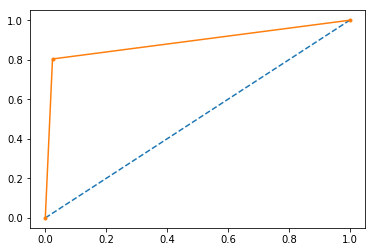

In [29]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

f1=0.970 auc=0.979 ap=0.959


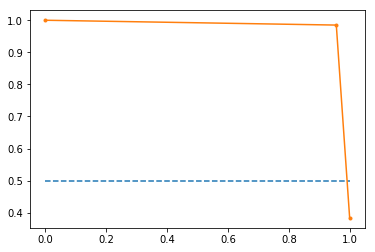

In [42]:
# calculate precision-recall curve
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y, y_pred)
# calculate F1 score
f1 = f1_score(y, y_pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()